## Classify the size categories using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('H:/ExcelR Data Science/datasets_BA/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.shape

(517, 31)

In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

Dummy variables for categorical columns 'month' and 'day' are already created in the dataset.So dropping the 'month' and 'day' columns from the dataframe.

In [5]:
df.drop(['month','day'],axis=1,inplace=True)

In [6]:
df.shape

(517, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [8]:
## checking output column
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
# Label encoding size category column

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])
print(le.classes_)

['large' 'small']


In [10]:
df['size_category'].dtypes

dtype('int32')

In [11]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='forestfires_profile.html')

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.drop_duplicates(keep=False,inplace=True)

In [13]:
print('Shape of dataframe after dropping duplicates',df.shape)

Shape of dataframe after dropping duplicates (501, 29)


In [14]:
## Splitting into X and Y
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [15]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


### Standardizing continuous column type using ColumnTransformer

As SVM is scale sensitive, we will standardize the continuous columns leaving out the discrete categorical ones

In [16]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [17]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,90.590619,109.578842,547.630339,9.025549,18.840918,44.217565,4.004990,0.019162,13.143174,0.161677,...,0.039920,0.003992,0.063872,0.029940,0.103792,0.003992,0.001996,0.029940,0.343313,0.726547
std,5.591709,63.546318,248.330243,4.611358,5.876331,16.414219,1.810424,0.296567,64.622131,0.368522,...,0.195967,0.063119,0.244770,0.170592,0.305296,0.063119,0.044677,0.170592,0.475290,0.446177
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,61.100000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.710000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,141.200000,713.000000,11.000000,22.800000,53.000000,5.400000,0.000000,6.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

t=[('num',StandardScaler(),['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])]
transformer=ColumnTransformer(transformers=t,remainder='passthrough')

# fit training data
transformer.fit(X_train)

# transform training data
X_train = transformer.transform(X_train)

# transform the test data
X_test = transformer.transform(X_test)


In [19]:
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (350, 28)
Shape of testing data (151, 28)


### Building SVM model

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [21]:
# Defining base model
model=SVC()

# model evaluation method
cv1= StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv1, n_jobs=-1)

# Mean accuracy
print("The mean roc_auc score for base model is:",np.mean(scores))

The mean roc_auc score for base model is: 0.8614097007223942


In [22]:
## Fitting the model and making predictions

svc1= SVC(C=1.0,class_weight='balanced',random_state=50)
svc1.fit(X_train,Y_train)
pred1=svc1.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
names=['0-large fire','1-small fire']
print(classification_report(Y_test, pred1,target_names=names))

              precision    recall  f1-score   support

0-large fire       0.53      0.42      0.47        38
1-small fire       0.82      0.88      0.85       113

    accuracy                           0.76       151
   macro avg       0.68      0.65      0.66       151
weighted avg       0.75      0.76      0.75       151



In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, pred1)
conf_matrix1

array([[16, 22],
       [14, 99]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

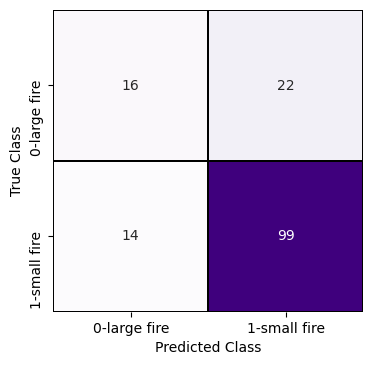

In [25]:
import seaborn as sns
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-large fire','1-small fire']
ylabels=['0-large fire','1-small fire']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


+ This model does a better job in predicting small fires(label 1) with high precision and recall.
+ The recall and precision for predicting large fire(label 0)is quite less.